In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_intraday_impluse_strategy import (
    TSMyoIntradayImpluseStrategy,
)
from datetime import datetime

2020-03-19 23:34:05.554291	开始加载历史数据
2020-03-19 23:34:05.555292	加载进度： [2%]
2020-03-19 23:34:05.556293	加载进度： [3%]
2020-03-19 23:34:05.557294	加载进度： [5%]
2020-03-19 23:34:05.700425	加载进度： [6%]
2020-03-19 23:34:05.990688	加载进度： [8%]
2020-03-19 23:34:06.323372	加载进度： [9%]
2020-03-19 23:34:06.650324	加载进度：# [11%]
2020-03-19 23:34:07.025642	加载进度：# [13%]
2020-03-19 23:34:07.288333	加载进度：# [14%]
2020-03-19 23:34:07.535064	加载进度：# [16%]
2020-03-19 23:34:07.913410	加载进度：# [17%]
2020-03-19 23:34:08.213684	加载进度：# [19%]
2020-03-19 23:34:08.549498	加载进度：## [21%]
2020-03-19 23:34:08.766696	加载进度：## [22%]
2020-03-19 23:34:09.047952	加载进度：## [24%]
2020-03-19 23:34:09.290173	加载进度：## [25%]
2020-03-19 23:34:09.640518	加载进度：## [27%]
2020-03-19 23:34:09.895970	加载进度：## [28%]
2020-03-19 23:34:10.164326	加载进度：### [30%]
2020-03-19 23:34:10.525714	加载进度：### [32%]
2020-03-19 23:34:10.782455	加载进度：### [33%]
2020-03-19 23:34:10.999652	加载进度：### [35%]
2020-03-19 23:34:11.259888	加载进度：### [36%]
2020-03-19 23:34:11.649753	加载进度：### [38%

C:\ProgramData\Anaconda3\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:460: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


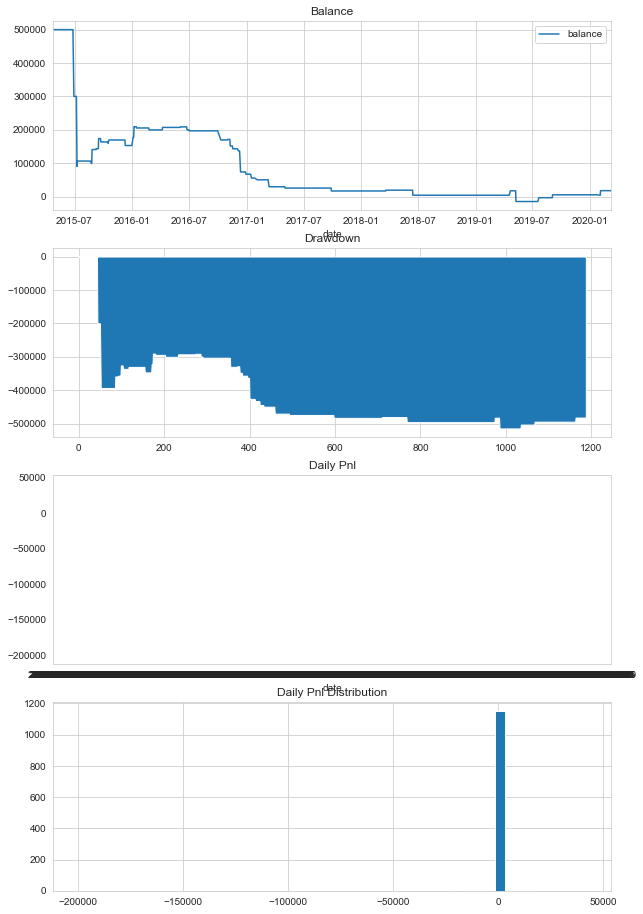

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2020, 3, 10),
    rate=0.25/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoIntradayImpluseStrategy, {})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [4]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("impluse_mul", 2, 6, 1)
setting.add_parameter("atr_len", 5, 20, 5)
setting.add_parameter("target_mul", 1, 2, 0.5)
setting.add_parameter("trailing_stop", 0.6, 1.0, 0.2)
setting.add_parameter("stop_loss_mul", 0.4, 0.7, 0.1) 

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.6, 'stop_loss_mul': 0.4}, 目标：0.5217472316266636
2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.6, 'stop_loss_mul': 0.5}, 目标：0.5217472316266636
2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.6, 'stop_loss_mul': 0.6}, 目标：0.5217472316266636
2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.6, 'stop_loss_mul': 0.7}, 目标：0.5217472316266636
2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.8, 'stop_loss_mul': 0.4}, 目标：0.5217472316266636
2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.8, 'stop_loss_mul': 0.5}, 目标：0.5217472316266636
2020-03-20 00:17:55.271863	参数：{'impluse_mul': 2, 'atr_len': 5, 'target_mul': 1, 'trailing_stop': 0.8, 'stop_loss_mul':

从总样本内（共10段）取5段数据组成样本内，共有252种取法
样本内组合为(0, 1, 2, 3, 4)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(0, 1, 2, 3, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9666666666666667
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9833333333333333
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9833333333333333
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 5, 9)时，样本内

样本内组合为(1, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 3, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 4, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 2, 4, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1

0.023809523809523808

2020-03-19 10:10:52.379777	开始加载历史数据
2020-03-19 10:10:52.380768	加载进度： [1%]
2020-03-19 10:10:52.380768	加载进度： [2%]
2020-03-19 10:10:52.380768	加载进度： [2%]
2020-03-19 10:10:52.380768	加载进度： [3%]
2020-03-19 10:10:52.380768	加载进度： [4%]
2020-03-19 10:10:52.380768	加载进度： [5%]
2020-03-19 10:10:52.380768	加载进度： [6%]
2020-03-19 10:10:52.380768	加载进度： [6%]
2020-03-19 10:10:52.380768	加载进度： [7%]
2020-03-19 10:10:52.381769	加载进度： [8%]
2020-03-19 10:10:52.381769	加载进度： [9%]
2020-03-19 10:10:52.381769	加载进度： [10%]
2020-03-19 10:10:52.381769	加载进度：# [10%]
2020-03-19 10:10:52.381769	加载进度：# [11%]
2020-03-19 10:10:52.381769	加载进度：# [12%]
2020-03-19 10:10:52.381769	加载进度：# [13%]
2020-03-19 10:10:52.381769	加载进度：# [14%]
2020-03-19 10:10:52.382770	加载进度：# [15%]
2020-03-19 10:10:52.382770	加载进度：# [15%]
2020-03-19 10:10:52.383240	加载进度：# [16%]
2020-03-19 10:10:52.383240	加载进度：# [17%]
2020-03-19 10:10:52.383240	加载进度：# [18%]
2020-03-19 10:10:52.383771	加载进度：# [19%]
2020-03-19 10:10:52.383771	加载进度：# [19%]
2020-03-19 10:10:52.383771	

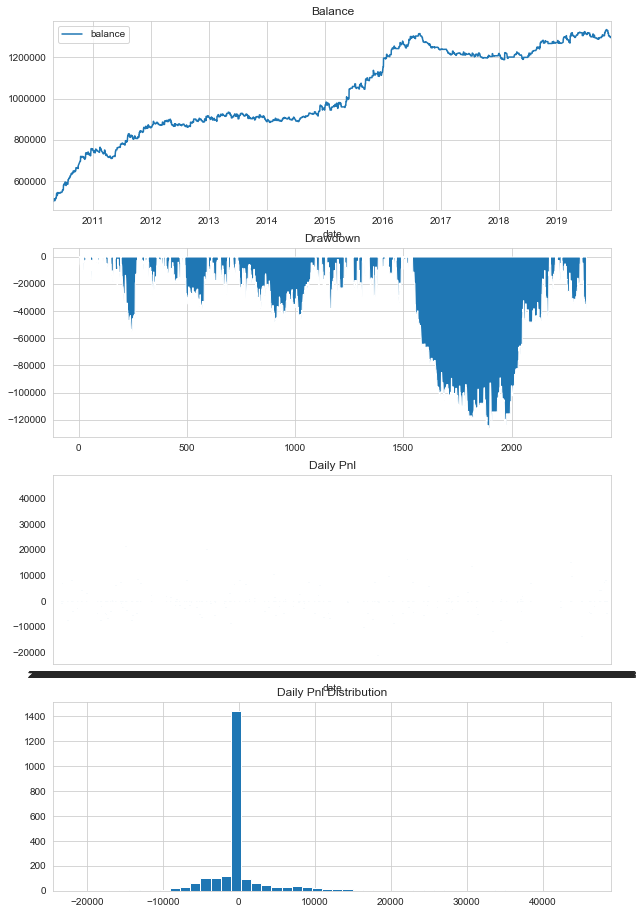

In [18]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 3, 10),
    rate=0.3/10000,
    slippage=0.6,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKKURTStrategy,{'atr_stop': 7, 'kurt_filter': -0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

In [19]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("atr_stop", 4, 7, 1) # 4
setting.add_parameter("kurt_filter", -2, 0, 0.2) # 0.55
#setting.add_parameter("atr_window", 50, 80, 5) # 44
#setting.add_parameter("atr_ma_len", 20, 40, 5) # 22

op_re = engine2.run_optimization(setting)
engine2.calc_pbo(op_re, 10)

2020-03-19 10:19:42.355580	参数：{'atr_stop': 7, 'kurt_filter': -1.6}, 目标：0.8278872488540575
2020-03-19 10:19:42.355580	参数：{'atr_stop': 7, 'kurt_filter': -2}, 目标：0.8254621005776716
2020-03-19 10:19:42.355580	参数：{'atr_stop': 7, 'kurt_filter': -1.8}, 目标：0.8254194274240957
2020-03-19 10:19:42.355580	参数：{'atr_stop': 7, 'kurt_filter': -1.2000000000000002}, 目标：0.7968418684352113
2020-03-19 10:19:42.355580	参数：{'atr_stop': 7, 'kurt_filter': -1.4000000000000001}, 目标：0.7893370564593556
2020-03-19 10:19:42.355580	参数：{'atr_stop': 7, 'kurt_filter': -1.0000000000000002}, 目标：0.7695954718850994
2020-03-19 10:19:42.356581	参数：{'atr_stop': 6, 'kurt_filter': -2}, 目标：0.7466834510378534
2020-03-19 10:19:42.356581	参数：{'atr_stop': 6, 'kurt_filter': -1.6}, 目标：0.7466697411821926
2020-03-19 10:19:42.356581	参数：{'atr_stop': 6, 'kurt_filter': -1.8}, 目标：0.7460820181960874
2020-03-19 10:19:42.356581	参数：{'atr_stop': 6, 'kurt_filter': -1.2000000000000002}, 目标：0.720535930607345
2020-03-19 10:19:42.356581	参数：{'atr_stop': 7,

样本内组合为(0, 1, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6590909090909091
样本内组合为(0, 1, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9318181818181818
样本内组合为(0, 1, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6818181818181818
样本内组合为(0, 1, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8409090909090909
样本内组合为(0, 1, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8409090909090909
样本内组合为(0, 1, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7272727272727273
样本内组合为(0, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9545454545454546
样本内组合为(0, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5909090909090909
样本内组合为(0, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5681818181818182
样本内组合为(0, 2, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7954545454545454
样本内组合为(0, 2, 3, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4772727272727273
样本内组合为(0, 2, 3, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7954545454545454
样本内组合为(0, 2, 3

0.17063492063492064

2020-03-14 21:13:15.639981	开始加载历史数据
2020-03-14 21:13:15.639981	加载进度： [3%]
2020-03-14 21:13:15.639981	加载进度： [5%]
2020-03-14 21:13:15.640983	加载进度： [8%]
2020-03-14 21:13:15.640983	加载进度：# [10%]
2020-03-14 21:13:15.640983	加载进度：# [13%]
2020-03-14 21:13:15.640983	加载进度：# [15%]
2020-03-14 21:13:15.640983	加载进度：# [18%]
2020-03-14 21:13:15.640983	加载进度：## [21%]
2020-03-14 21:13:15.640983	加载进度：## [23%]
2020-03-14 21:13:15.640983	加载进度：## [26%]
2020-03-14 21:13:15.640983	加载进度：## [28%]
2020-03-14 21:13:15.641984	加载进度：### [31%]
2020-03-14 21:13:15.641984	加载进度：### [34%]
2020-03-14 21:13:15.641984	加载进度：### [36%]
2020-03-14 21:13:15.641984	加载进度：### [39%]
2020-03-14 21:13:15.641984	加载进度：#### [41%]
2020-03-14 21:13:15.641984	加载进度：#### [44%]
2020-03-14 21:13:15.641984	加载进度：#### [46%]
2020-03-14 21:13:15.641984	加载进度：#### [49%]
2020-03-14 21:13:15.642985	加载进度：##### [52%]
2020-03-14 21:13:15.642985	加载进度：##### [54%]
2020-03-14 21:13:15.642985	加载进度：##### [57%]
2020-03-14 21:13:15.642985	加载进度：##### [59%]
2020-03-14

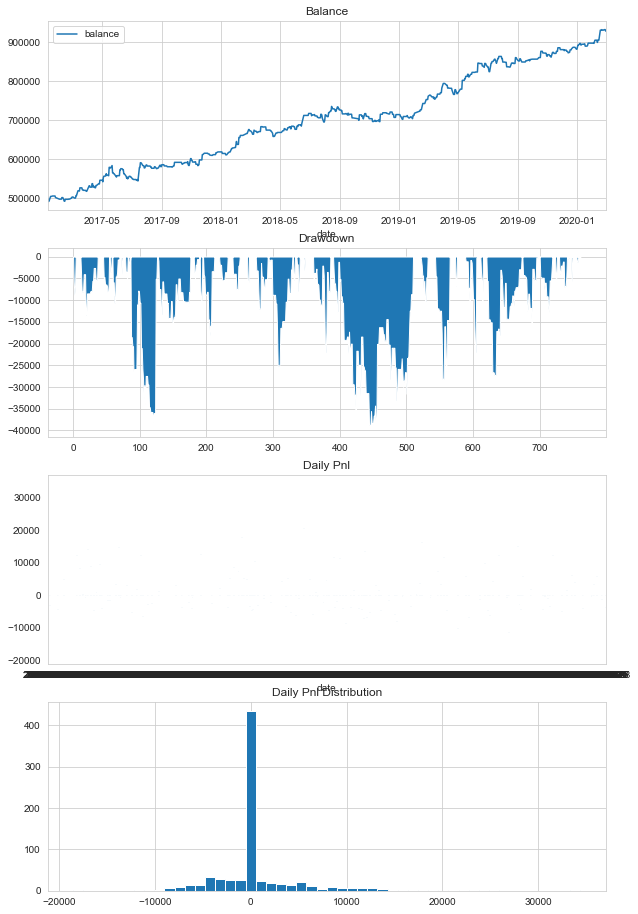

In [29]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2020, 3, 10),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 5, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:09:58.530770	开始加载历史数据
2019-12-20 12:09:58.530770	加载进度： [8%]
2019-12-20 12:09:58.530770	加载进度：# [16%]
2019-12-20 12:09:58.531771	加载进度：## [25%]
2019-12-20 12:09:58.531771	加载进度：### [33%]
2019-12-20 12:09:58.531771	加载进度：#### [41%]
2019-12-20 12:09:58.531771	加载进度：#### [49%]
2019-12-20 12:09:58.531771	加载进度：##### [57%]
2019-12-20 12:09:58.531771	加载进度：###### [66%]
2019-12-20 12:09:58.531771	加载进度：####### [74%]
2019-12-20 12:09:58.531771	加载进度：######## [82%]
2019-12-20 12:09:58.532773	加载进度：######### [90%]
2019-12-20 12:09:58.532773	加载进度：######### [98%]
2019-12-20 12:09:58.532773	加载进度：########## [100%]
2019-12-20 12:09:58.532773	历史数据加载完成，数据量：58560
2019-12-20 12:09:58.564276	策略初始化完成
2019-12-20 12:09:58.564276	开始回放历史数据
2019-12-20 12:10:00.743643	历史数据回放结束
2019-12-20 12:10:00.744644	开始计算逐日盯市盈亏
2019-12-20 12:10:00.748691	逐日盯市盈亏计算完成
2019-12-20 12:10:00.748691	开始计算策略统计指标
2019-12-20 12:10:00.755894	------------------------------
2019-12-20 12:10:00.755894	首个交易日：	2016-01-11
2019-12-20 12:10:00

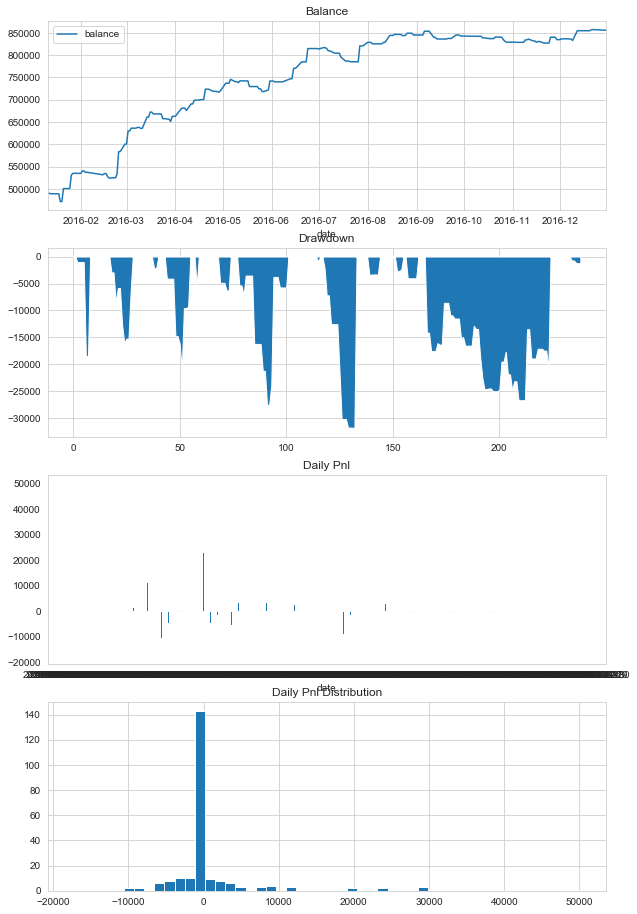

In [11]:
# 样本内每年 2016-17
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2017, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:09:46.444700	开始加载历史数据
2019-12-20 12:09:46.444700	加载进度： [8%]
2019-12-20 12:09:46.444700	加载进度：# [16%]
2019-12-20 12:09:46.444700	加载进度：## [25%]
2019-12-20 12:09:46.444700	加载进度：### [33%]
2019-12-20 12:09:46.444700	加载进度：#### [41%]
2019-12-20 12:09:46.444700	加载进度：#### [49%]
2019-12-20 12:09:46.444700	加载进度：##### [58%]
2019-12-20 12:09:46.444700	加载进度：###### [66%]
2019-12-20 12:09:46.444700	加载进度：####### [74%]
2019-12-20 12:09:46.444700	加载进度：######## [82%]
2019-12-20 12:09:46.444700	加载进度：######### [90%]
2019-12-20 12:09:46.445701	加载进度：######### [99%]
2019-12-20 12:09:46.445701	加载进度：########## [100%]
2019-12-20 12:09:46.445701	历史数据加载完成，数据量：47520
2019-12-20 12:09:46.481240	策略初始化完成
2019-12-20 12:09:46.482241	开始回放历史数据
2019-12-20 12:09:48.210081	历史数据回放结束
2019-12-20 12:09:48.210081	开始计算逐日盯市盈亏
2019-12-20 12:09:48.225709	逐日盯市盈亏计算完成
2019-12-20 12:09:48.225709	开始计算策略统计指标
2019-12-20 12:09:48.225709	------------------------------
2019-12-20 12:09:48.225709	首个交易日：	2015-04-24
2019-12-20 12:09:48

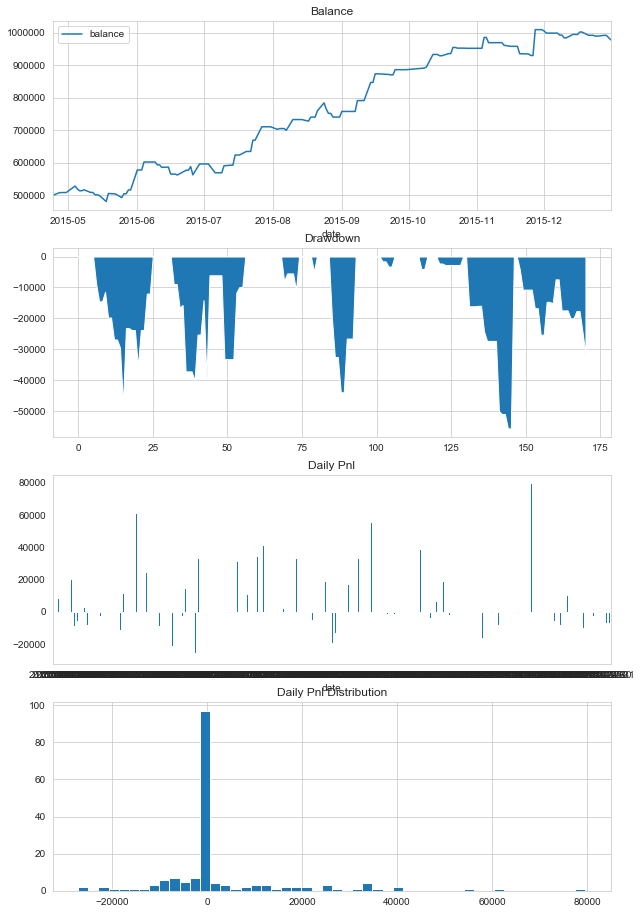

In [10]:
# 样本内每年 2015-16
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2016, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-16 14:56:11.167765	开始加载历史数据
2019-12-16 14:56:11.167765	加载进度： [2%]
2019-12-16 14:56:11.167765	加载进度： [3%]
2019-12-16 14:56:11.167765	加载进度： [5%]
2019-12-16 14:56:11.167765	加载进度： [7%]
2019-12-16 14:56:11.167765	加载进度： [8%]
2019-12-16 14:56:11.167765	加载进度： [10%]
2019-12-16 14:56:11.167765	加载进度：# [12%]
2019-12-16 14:56:11.167765	加载进度：# [13%]
2019-12-16 14:56:11.167765	加载进度：# [15%]
2019-12-16 14:56:11.167765	加载进度：# [16%]
2019-12-16 14:56:11.167765	加载进度：# [18%]
2019-12-16 14:56:11.167765	加载进度：# [20%]
2019-12-16 14:56:11.167765	加载进度：## [21%]
2019-12-16 14:56:11.167765	加载进度：## [23%]
2019-12-16 14:56:11.167765	加载进度：## [25%]
2019-12-16 14:56:11.167765	加载进度：## [26%]
2019-12-16 14:56:11.167765	加载进度：## [28%]
2019-12-16 14:56:11.167765	加载进度：## [30%]
2019-12-16 14:56:11.167765	加载进度：### [31%]
2019-12-16 14:56:11.167765	加载进度：### [33%]
2019-12-16 14:56:11.167765	加载进度：### [35%]
2019-12-16 14:56:11.167765	加载进度：### [36%]
2019-12-16 14:56:11.167765	加载进度：### [38%]
2019-12-16 14:56:11.167765	加载进度：### [39

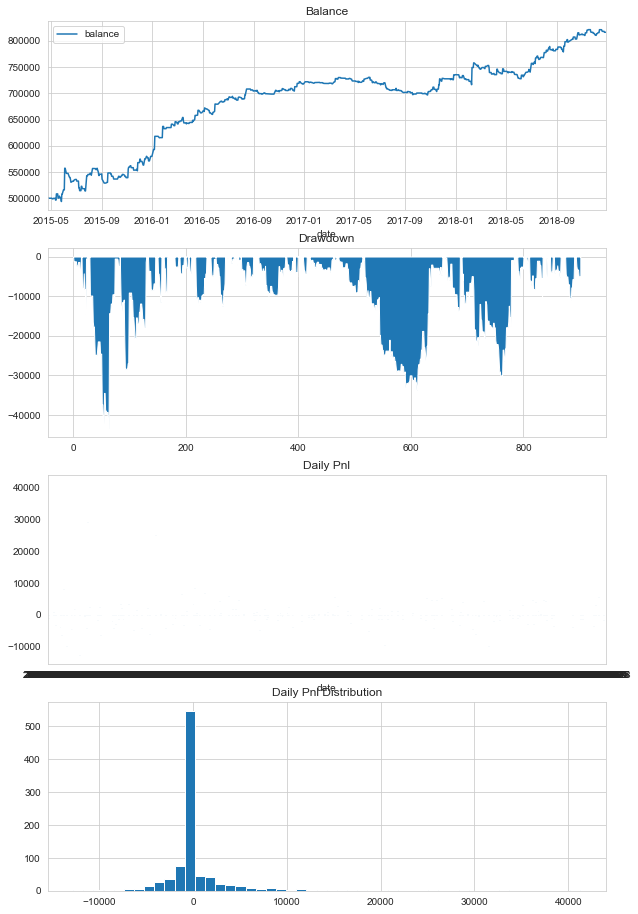

In [4]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

In [6]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("atr_stop", 3, 6, 0.5) # 4
#setting.add_parameter("trailing_short", 0.3, 0.6, 0.05) # 0.4
#setting.add_parameter("trailing_long", 0.3, 0.6, 0.05) # 0.4
setting.add_parameter("atr_window", 20, 60, 4) # 44
setting.add_parameter("atr_ma_len", 16, 40, 2) # 22

engine2.run_optimization(setting)

2019-12-16 15:00:14.392390	参数：{'atr_window': 24, 'atr_ma_len': 16}, 目标：1.4352150721685117
2019-12-16 15:00:14.392390	参数：{'atr_window': 28, 'atr_ma_len': 32}, 目标：1.434102184137379
2019-12-16 15:00:14.392390	参数：{'atr_window': 28, 'atr_ma_len': 34}, 目标：1.4139702801845824
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 40}, 目标：1.3971258848660566
2019-12-16 15:00:14.392390	参数：{'atr_window': 56, 'atr_ma_len': 38}, 目标：1.3905074505785386
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 38}, 目标：1.3702499365892344
2019-12-16 15:00:14.392390	参数：{'atr_window': 48, 'atr_ma_len': 40}, 目标：1.364750902491683
2019-12-16 15:00:14.392390	参数：{'atr_window': 24, 'atr_ma_len': 38}, 目标：1.3628886023841191
2019-12-16 15:00:14.392390	参数：{'atr_window': 52, 'atr_ma_len': 38}, 目标：1.3581196744008468
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 36}, 目标：1.3581051774668824
2019-12-16 15:00:14.392390	参数：{'atr_window': 20, 'atr_ma_len': 18}, 目标：1.354321748458312
2019-12-16 15

[("{'atr_window': 24, 'atr_ma_len': 16}",
  1.4352150721685117,
  {'start_date': datetime.date(2015, 4, 24),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 902,
   'profit_days': 202,
   'loss_days': 207,
   'capital': 500000,
   'end_balance': 777849.7363999975,
   'max_drawdown': -43131.77880000061,
   'max_ddpercent': -7.692050223861405,
   'max_drawdown_duration': 95,
   'total_net_pnl': 277849.73639999767,
   'daily_net_pnl': 308.0374017738333,
   'total_commission': 32230.2636,
   'daily_commission': 35.73199955654102,
   'total_slippage': 85920.0,
   'daily_slippage': 95.2549889135255,
   'total_turnover': 1074342120.0,
   'daily_turnover': 1191066.6518847006,
   'total_trade_count': 1432,
   'daily_trade_count': 1.5875831485587584,
   'total_return': 55.56994727999949,
   'annual_return': 14.785795285143989,
   'daily_return': 0.04854140921686434,
   'return_std': 0.5239634759807799,
   'sharpe_ratio': 1.4352150721685117,
   'return_drawdown_ratio': 7.224334951378

2019-12-16 19:56:03.517048	开始加载历史数据
2019-12-16 19:56:03.517048	加载进度： [2%]
2019-12-16 19:56:03.517048	加载进度： [3%]
2019-12-16 19:56:03.517048	加载进度： [5%]
2019-12-16 19:56:03.518049	加载进度： [7%]
2019-12-16 19:56:03.518049	加载进度： [8%]
2019-12-16 19:56:03.518049	加载进度： [10%]
2019-12-16 19:56:03.518049	加载进度：# [12%]
2019-12-16 19:56:03.518049	加载进度：# [13%]
2019-12-16 19:56:03.518049	加载进度：# [15%]
2019-12-16 19:56:03.518049	加载进度：# [16%]
2019-12-16 19:56:03.518049	加载进度：# [18%]
2019-12-16 19:56:03.518049	加载进度：# [20%]
2019-12-16 19:56:03.518049	加载进度：## [21%]
2019-12-16 19:56:03.518049	加载进度：## [23%]
2019-12-16 19:56:03.518049	加载进度：## [25%]
2019-12-16 19:56:03.518049	加载进度：## [26%]
2019-12-16 19:56:03.518049	加载进度：## [28%]
2019-12-16 19:56:03.518049	加载进度：## [30%]
2019-12-16 19:56:03.518049	加载进度：### [31%]
2019-12-16 19:56:03.518049	加载进度：### [33%]
2019-12-16 19:56:03.518049	加载进度：### [35%]
2019-12-16 19:56:03.518049	加载进度：### [36%]
2019-12-16 19:56:03.518049	加载进度：### [38%]
2019-12-16 19:56:03.518049	加载进度：### [39

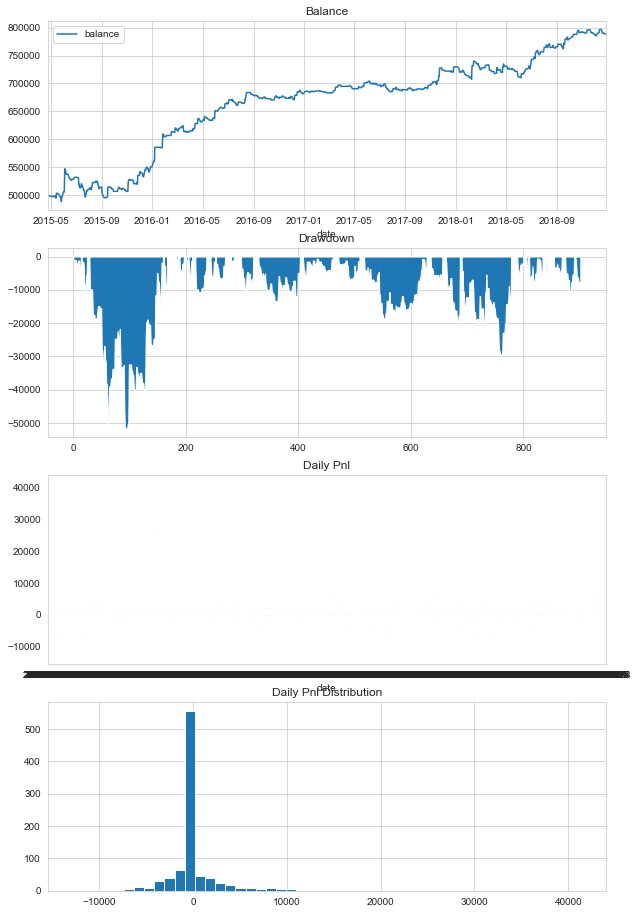

In [7]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 24, 'atr_ma_len': 16, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()